In [1]:
from pyforest import *

In [2]:
df=pd.read_csv("Data01.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


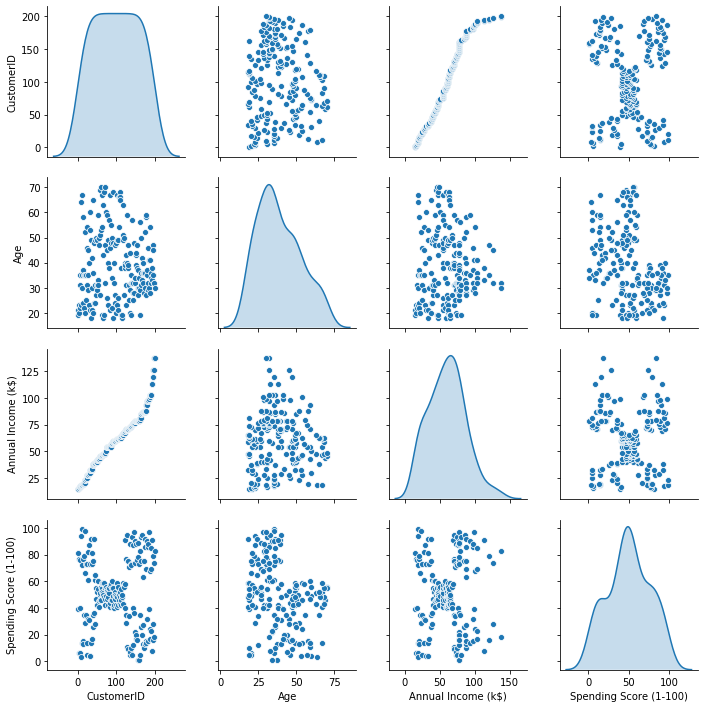

In [38]:
sns.pairplot(df,diag_kind="kde")

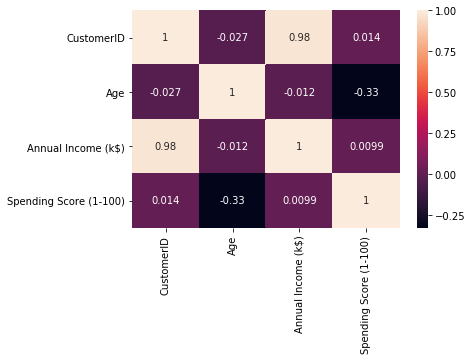

In [39]:
sns.heatmap(df.corr(),annot=True)

In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
sns.boxplot(x="Age",data=df)

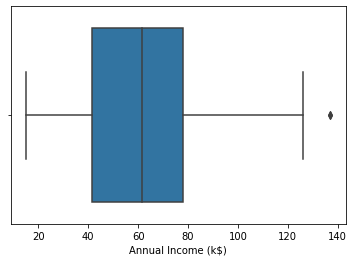

In [6]:
sns.boxplot(x='Annual Income (k$)',data=df)

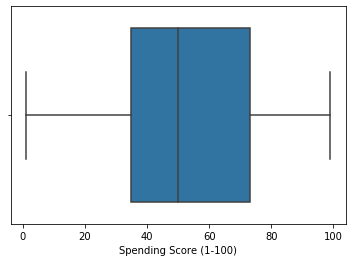

In [7]:
sns.boxplot(x="Spending Score (1-100)",data=df)

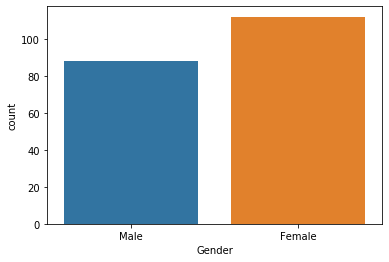

In [8]:
sns.countplot(df["Gender"])

In [9]:
df1=df.drop("Gender",axis=1)

In [10]:
df1=df1.drop("CustomerID",axis=1)

In [11]:
df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


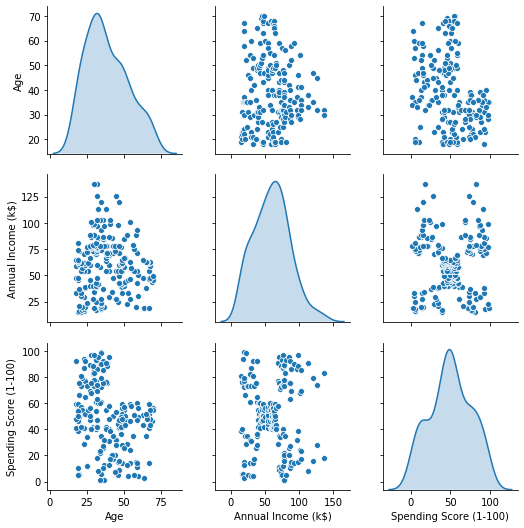

In [78]:
sns.pairplot(df1,diag_kind="kde")

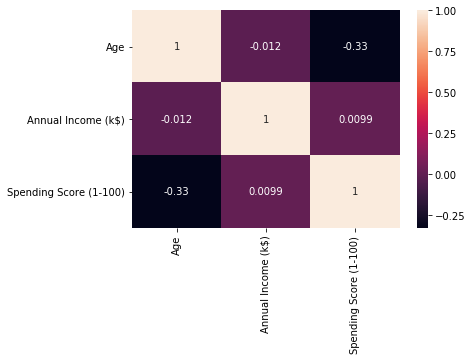

In [79]:
sns.heatmap(df1.corr(),annot=True)

In [12]:
df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


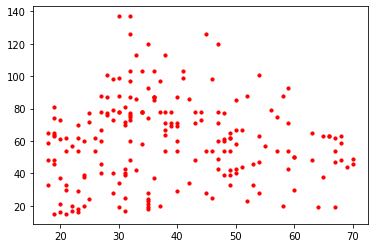

In [81]:
plt.scatter(df1["Age"],df1["Annual Income (k$)"], c='red', s=10)

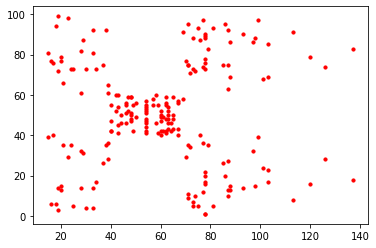

In [82]:
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"], c='red', s=10)

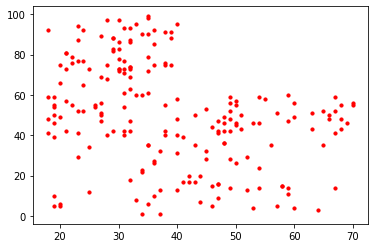

In [83]:
plt.scatter(df1["Age"],df1["Spending Score (1-100)"], c='red', s=10)

In [13]:
from scipy.stats import zscore
df2=df1.apply(zscore)
df2.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [14]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 10)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df2)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]


,num_clusters,cluster_errors
0,1,600.000000
1,2,389.386189
2,3,295.212246
3,4,205.225147
4,5,168.247580
5,6,133.957838
6,7,117.160377
7,8,104.154299
8,9,94.864601


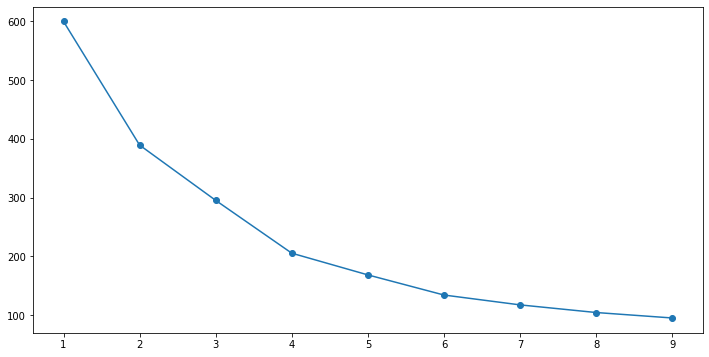

In [15]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [16]:
from __future__ import division
def cluster_size():
    
    for i in clusters_df.num_clusters:
        slope=np.diff(clusters_df.cluster_errors)-np.diff(clusters_df.num_clusters)
        slope1=sorted(slope,reverse=False)
    print("slopes:",slope)
    print("slopes1:",slope1)

    x=slope[:-1]/slope[1:]
    # print(x)
    z=1
    for i in range (0,len(x)):
        n=np.diff(x)
    # print(n)
    z=1
    for i in n:
        if abs(i)>1:
            z=z+1
        else:
            break
    return(z)

print(clusters_df[0:15])
print()
print("Cluster size may be",cluster_size())

   num_clusters  cluster_errors
0             1      600.000000
1             2      389.386189
2             3      295.212246
3             4      205.225147
4             5      168.247580
5             6      133.957838
6             7      117.160377
7             8      104.154299
8             9       94.864601

slopes: [-211.61381104  -95.1739428   -90.98709868  -37.9775673   -35.28974179
  -17.797461    -14.00607856  -10.28969762]
slopes1: [-211.6138110435628, -95.17394280088837, -90.98709867878966, -37.97756730119079, -35.28974179102073, -17.7974610018571, -14.006078559254746, -10.289697622475614]
Cluster size may be 4


In [17]:


# Number of clusters

kmeans = KMeans(n_clusters=5)

# Fitting the input data

kmeans = kmeans.fit(df2) ##find centroid

# Getting the cluster labels

labels = kmeans.predict(df2) ## finding labels:new points

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn


Centroid values
sklearn
[[ 1.20484056 -0.23577338 -0.05236781]
 [-0.42880597  0.97484722  1.21608539]
 [ 0.07333084  0.97494509 -1.19729675]
 [ 0.5310735  -1.2905084  -1.23646671]
 [-0.98067852 -0.74305983  0.46744035]]


In [18]:
prediction= kmeans.predict(df2)
df2["group"] = prediction
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),group
0,-1.424569,-1.738999,-0.434801,4
1,-1.281035,-1.738999,1.195704,4
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,4
4,-0.563369,-1.662660,-0.395980,4


In [19]:
df2.group.value_counts()

4    54
0    47
1    40
2    39
3    20
Name: group, dtype: int64

In [20]:
for i in cluster_range:
    points = np.array(df2.loc[df2['group'] == i])
##     print(points)
points

array([], shape=(0, 4), dtype=float64)

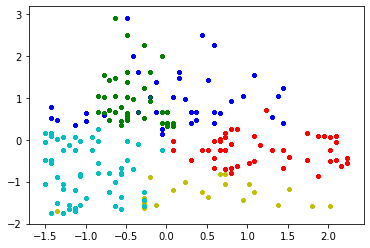

In [21]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(df2.loc[df2['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


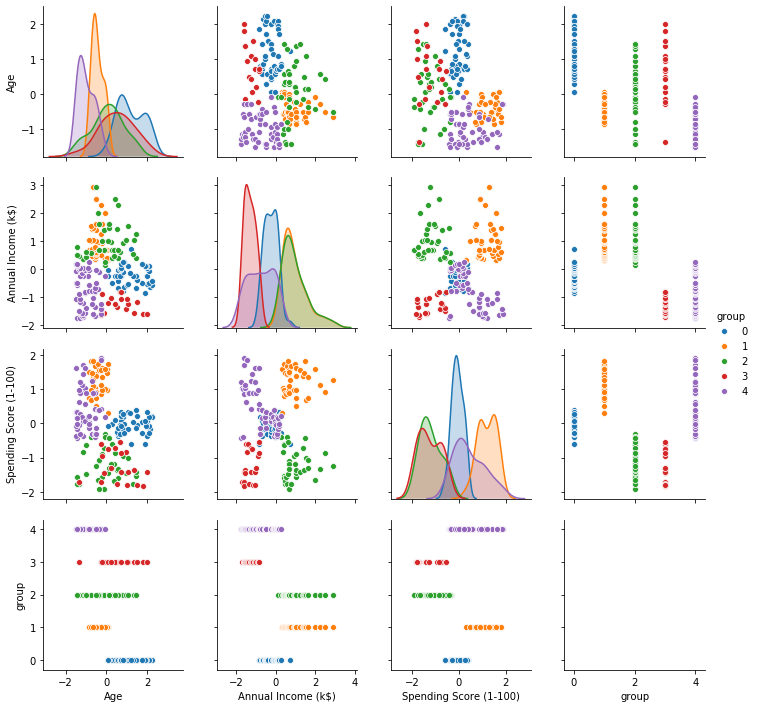

In [22]:
sns.pairplot(df2,diag_kind="kde",hue="group")

In [120]:
#########################################################################################################################

In [38]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
df3=df.drop("CustomerID",axis=1)
df3.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [25]:
# df3=df.drop("Annual Income (k$)",axis=1)


In [40]:
df3.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [41]:
df3 = pd.get_dummies(df3,drop_first=True)

In [42]:
df3.head(10)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
5,22,17,76,0
6,35,18,6,0
7,23,18,94,0
8,64,19,3,1
9,30,19,72,0


In [43]:
from scipy.stats import zscore
df4=df3.apply(zscore)
df4.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [44]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 10)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df4)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,800.000000
1,2,588.802677
2,3,476.787554
3,4,386.714786
4,5,331.995435
5,6,276.371317
6,7,235.606969
7,8,200.403580
8,9,174.134842


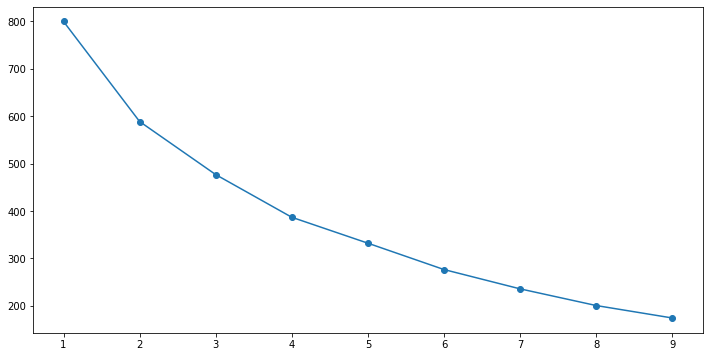

In [45]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [46]:
from __future__ import division
def cluster_size():
    
    for i in clusters_df.num_clusters:
        slope=np.diff(clusters_df.cluster_errors)-np.diff(clusters_df.num_clusters)
        slope1=sorted(slope,reverse=False)
    print("slopes:",slope)
    print()
    print("slopes1:",slope1)

    x=slope[:-1]/slope[1:]
    # print(x)
    z=1
    for i in range (0,len(x)):
        n=np.diff(x)
    # print(n)
    z=1
    for i in n:
        if abs(i)>1:
            z=z+1
        else:
            break
    return(z)

# print(clusters_df[0:15])
print()
print("Cluster size may be",cluster_size())


slopes: [-212.19732322 -113.01512237  -91.07276864  -55.71935077  -56.62411758
  -41.7643486   -36.20338865  -27.26873773]

slopes1: [-212.19732321750644, -113.0151223689777, -91.07276863944719, -56.62411758453686, -55.71935076542047, -41.76434860329314, -36.20338865291157, -27.26873773306619]
Cluster size may be 1


In [52]:


# Number of clusters

kmeans = KMeans(n_clusters=6)

# Fitting the input data

kmeans = kmeans.fit(df4) ##find centroid

# Getting the cluster labels

labels = kmeans.predict(df4) ## finding labels:new points

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-7.71114195e-01 -8.46557761e-02  8.19747903e-01  1.12815215e+00
   1.02631579e+00]
 [ 6.00984158e-01  2.14012041e-02 -5.59967546e-01 -8.86405260e-01
  -4.44089210e-16]
 [ 1.27534357e+00 -5.16261272e-01 -4.33462805e-01  1.12815215e+00
   2.00000000e+00]
 [-4.85361243e-01  1.12370799e+00  1.21089512e+00 -7.11226355e-01
   1.00000000e+00]
 [-9.35250451e-01 -8.26402841e-01  3.81627706e-01 -8.86405260e-01
   6.06060606e-01]
 [-2.70069385e-02  9.67012443e-01 -1.39716754e+00  1.12815215e+00
   2.00000000e+00]]


In [53]:
prediction= kmeans.predict(df4)
df4["group"] = prediction
df4.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,group
0,-1.424569,-1.738999,-0.434801,1.128152,0
1,-1.281035,-1.738999,1.195704,1.128152,0
2,-1.352802,-1.700830,-1.715913,-0.886405,4
3,-1.137502,-1.700830,1.040418,-0.886405,4
4,-0.563369,-1.662660,-0.395980,-0.886405,4


In [54]:
for i in cluster_range:
    points4 = np.array(df4.loc[df4['group'] == i])
##     print(points)
points4

array([], shape=(0, 5), dtype=float64)

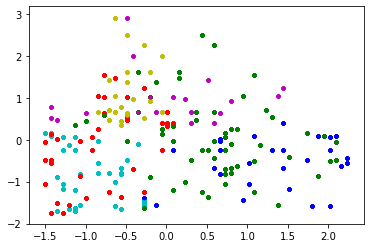

In [55]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points4 = np.array(df4.loc[df4['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points4[:, 0], points4[:, 1], s=7, c=colors[i])


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


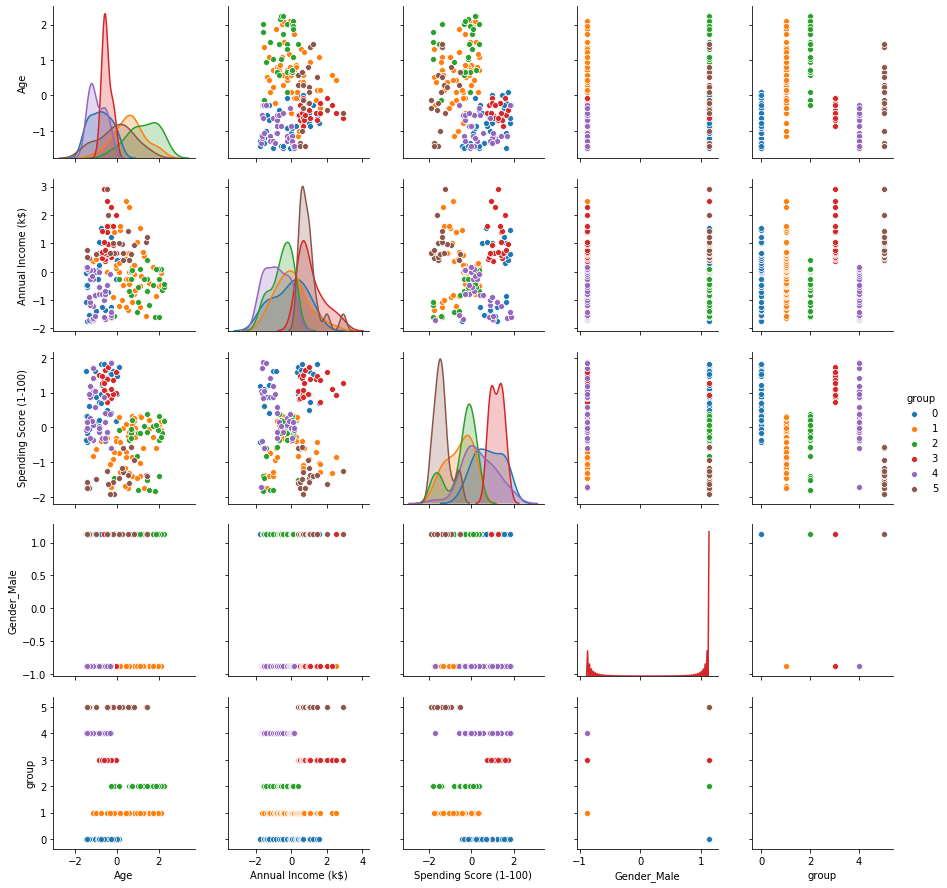

In [56]:
sns.pairplot(df4,diag_kind="kde",hue="group")

In [75]:
df4.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,group
0,-1.424569,-1.738999,-0.434801,1.128152,0
1,-1.281035,-1.738999,1.195704,1.128152,0
2,-1.352802,-1.700830,-1.715913,-0.886405,4
3,-1.137502,-1.700830,1.040418,-0.886405,4
4,-0.563369,-1.662660,-0.395980,-0.886405,4


In [57]:
##########################################################################################################################

In [59]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
Y=df.

In [60]:
X=df.drop("CustomerID",axis=1)

In [62]:
X= pd.get_dummies(X,drop_first=True)

In [63]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [2]:
from sklearn.decomposition import PCA

In [64]:
X_centered = (X - X.mean(axis=0))/np.std(X)

In [66]:
pca = PCA(n_components=4)
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [67]:
X_pca = pca.transform(X_centered)

In [68]:
X_pca.shape

(200, 4)

In [69]:
pca.components_

array([[ 0.68790025, -0.00608217, -0.68691996,  0.23430156],
       [-0.10368955,  0.7652519 ,  0.10321115,  0.62688553],
       [ 0.12238438,  0.64366712, -0.13657317, -0.74300906],
       [-0.70785859, -0.00672133, -0.70628337,  0.00740532]])

In [70]:
pca.explained_variance_ #variance for PC1 : 4.22824171 :eighen value

array([1.35437369, 1.05449828, 0.93510105, 0.67612749])

In [71]:
pca.explained_variance_ratio_# % of variance

array([0.33690046, 0.26230645, 0.23260639, 0.16818671])

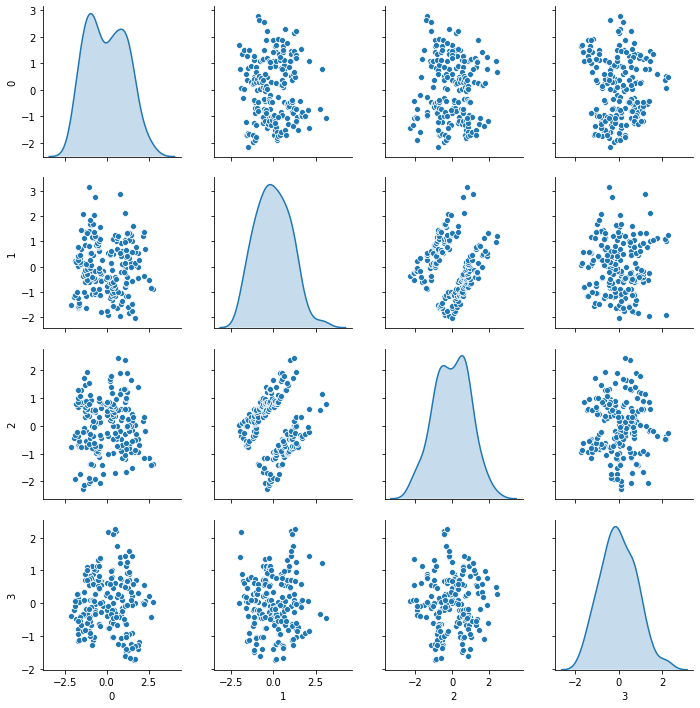

In [72]:
sns.pairplot(pd.DataFrame(X_pca),diag_kind='kde')

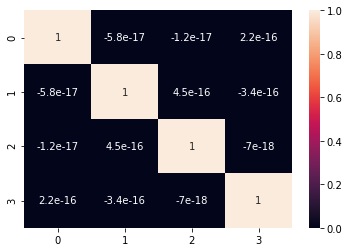

In [73]:
sns.heatmap(pd.DataFrame(X_pca).corr(),annot=True)

In [74]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


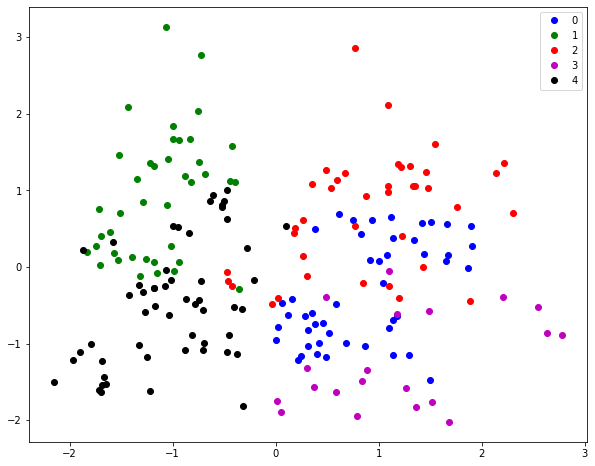

In [99]:
fig = plt.figure(1, figsize=(10, 8))

plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label=0)
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label=1)
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label=2)
plt.plot(X_pca[y == 3, 0], X_pca[y == 3, 1], 'mo', label=3)
plt.plot(X_pca[y == 4, 0], X_pca[y == 4, 1], 'ko', label=4)
plt.legend(loc=0)

plt.show()